# Kryptografia krat *(lattice-based cryptography)*
## Krata

**Kratą** $L$ stopnia $m$ nazywamy wolną grupę abelową wymiaru $m$ z działaniem dodawania w $\mathbb{R}^n$. Jeżeli $m=n$ to $L$ nazywamy kratą pełnego stopnia.

**Bazą kraty** nazwiemy dowolny zbiór liniowo niezależnych wektorów $\{b_1,...,b_m\}\subset\mathbb{R}^n$ takich, że $L=\text{span}_{\mathbb{Z}}(b_1,...,b_m)=\{k_1b_1+...+k_mb_m,\ k_1,...,k_m\in\mathbb{Z}\}$.

W literaturze spotykamy wiele definicji krat. Między innymi można zdefiniować kratę stosując notację macierzowa:
$$ L = \{x B: x \in \mathbb{Z}^m\} $$ 
gdzie $B$ jest macierzą, której wiersze to wektory bazy $L$. 

**Objętością (lub wyznacznikiem) kraty** $L$: $det(L) = |det(B)|$ (przy spełnieniu pewnych warunków).

Kraty są źródłem wielu problemów, na bazie których można skonstruować kryptosystemy (tzw. funkcje zapadkowe: w jednym kierunku łatwowykonywalne, operacja odwrotna jest bardzo wymagająca obliczeniowo). 
## Problem CVP 
Dany jest wektor $w\in\mathbb{R}^n$ nie należący do kraty $L$. Mając daną macierz bazy $B$ znaleźć wektor $v\in L$ najbliższy do $w$ w sensie normy Euklidesowej, tzn.$$\|v-w\|=\min_{u\in L}\|u-w\|$$

### Dobra i zła baza 
Ogólnie rzecz biorąc dobra baza to taka, na którą składają się stosunkowo krótkie wektory i w miarę ortogonalne. Zła baza to jej przeciwieństwo. 
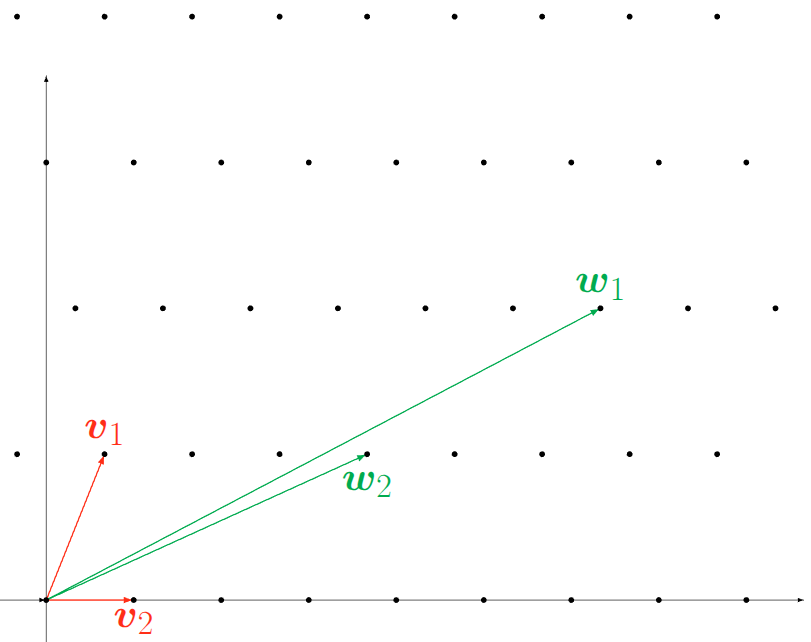

W kracie zdefiniowanej przez ,,dobrą'' bazę jest łatwiej rozwiązywać pewne problemy kratowe np. CVP.

## Algorytm Babai

Niech $L \subset \mathbb{R}^n$ jest kratą z wektorami bazowymi $\mathbf{v}_1,\ldots,\mathbf{v}_n$ oraz niech $\mathbf{w}\in \mathbb{R}^n$  będzie dowolnym wektorem. Jeśli wektory bazowe są wystarczająco ortogonalne względem siebie to następujący algorytm rozwiazuje problem CVP:
1. Zapisz wektor $\mathbf{w}$ jako liniową kombinację wektorów $\mathbf{v}_i$: $\mathbf{w}=t_1 \mathbf{v}_1+,\ldots,+t_n \mathbf{v}_n$ oraz $t_i \in \mathbb{R}$
2. Dokonaj zaokrąglenia $t_i$ do najbliższej liczby całkowitej: $a_i = \lfloor t_i \rceil$
3. Zwróć wektor $\mathbf{v} = a_1 \mathbf{v}_1+a_2 \mathbf{v}_2+,\ldots,+a_n \mathbf{v}_n$ 

#### Co to znaczy, że wektory bazowe są wystarczająco ortogonalne?
Baza *ortogonalna* jest definiowana przez wektory prostopadłe do siebie. W przypadku krat bazy nie muszą być definiowane przez takie wektory. Możemy określać jak daleko dana baza jest od idealnej ortogonalności. 
Służy do tego tzw. współczynnik Hadamarda (*Hadamard ratio*):
$$\mathcal{H}(\mathbf{v}_1,\mathbf{v}_2) = \frac{det(L)}{|\mathbf{v}_1|\cdot|\mathbf{v}_2|}$$


### Przykład 1
Rozważmy kratę $L \in \mathbb{R}^2$ zdefiniowaną przez dwa wektory bazowe:
$$ \mathbf{v}_1 = (137, 312)$$ oraz 
$$ \mathbf{v}_2 = (215, -187)$$
Dany jest wektor $\mathbf{w} = (53172, 81743)$.

Znajdź wektor w kracie najbliższy wektorowi $w$ (rozwiąż problem CVP). 

In [1]:
#Przykład działania algorytmu Babaia 
import numpy as np
from typing import Tuple
from sympy import sieve,prime
import random

# Przykład 2-wymiarowy
# Rozważmy kratę daną przez wektory bazowe v1 i v2 
v1 = np.array([137,312])
v2 = np.array([215,-187])

normv1 = np.linalg.norm(v1)
print(normv1)
normv2 = np.linalg.norm(v2)
print(normv2)

mw = np.array([v1,v2])
detL = np.abs(np.linalg.det(mw)) # jeśli macierz jest odwracalna to det(L(B)) = |det(B)| https://cseweb.ucsd.edu/classes/wi12/cse206A-a/lec1.pdf
print(detL)

Hr = np.sqrt(detL/(normv1*normv2))
print(Hr)

#Szukamy wektora w kracie, który jest blisko wektorowi 
w = np.array([53172, 81743])

#szukając t1 i t2 rozwiazujemy układ równań 
#53172 = 137*t1 + 215*t2 and 
#81743 = 312*t1 − 187*t2 
# w notacji macierzowej w = [t1,t2] @ np.array(v1,v2)

mw = np.array([v1,v2])
print(mw)
inv_mw = np.linalg.inv(mw)
print(inv_mw)
tw = w @ inv_mw
print(tw)

t1 = np.round(tw[0])
t2 = np.round(tw[1])
print(t1,t2)

t = np.array([t1,t2])
v = t @ mw 
print(f"Wektor w kracie najbliższy danemu wektorow:, {v}")
distVW = np.linalg.norm(v - w) 
print(f'Odległość wektora w kracie od danego wektora: {distVW}')

340.75357665034124
284.94560884491625
92698.99999999993
0.9770939601963543
[[ 137  312]
 [ 215 -187]]
[[ 0.00201728  0.00336573]
 [ 0.00231933 -0.0014779 ]]
[296.85227457  58.15459714]
297.0 58.0
Wektor w kracie najbliższy danemu wektorow:, [53159. 81818.]
Odległość wektora w kracie od danego wektora: 76.11832893594026


### Zadanie 1
Rozważmy tę samę kratę co powyżej, ale zdefiniowaną przy pomocy innych wektorów bazowych:
$$ \mathbf{v}_1 = (1975, 438)$$ oraz 
$$ \mathbf{v}_2 = (7548, 1627)$$
Zastosuj algorytm Babai do znalezienia wektora w kracie najbliższego wektorowi $\mathbf{w}$ z poprzedniego zadania. Jak blisko jest znaleziony wektor? Dlaczego osiągnięto taki wynik?

In [4]:
v1 = np.array([1975, 438])
v2 = np.array([7548, 1627])
w = np.array([53172, 81743])
norm_v1 = np.linalg.norm(v1)
norm_v2 = np.linalg.norm(v2)
print(f"||v1|| = {norm_v1:.4f}")
print(f"||v2|| = {norm_v2:.4f}")

B = np.array([v1, v2])
det_L = np.abs(np.linalg.det(B))
print(f"\nWyznacznik kraty: det(L) = {det_L:.4f}")

Hr = np.sqrt(det_L / (norm_v1 * norm_v2))
print(f"Współczynnik Hadamarda: {Hr:.6f}")

||v1|| = 2022.9852
||v2|| = 7721.3621

Wyznacznik kraty: det(L) = 92699.0000
Współczynnik Hadamarda: 0.077036


In [10]:
inv_B = np.linalg.inv(B)
coords = w @ inv_B
t1 = np.round(coords[0])
t2 = np.round(coords[1])
print(f"Po zaokrągleniu: t1 = {t1:.0f}, t2 = {t2:.0f}")

t = np.array([t1, t2])
v = t @ B

# Błąd
error = v - w
dist = np.linalg.norm(error)
print(f"Odległość: ||v - w|| = {dist:.4f}")


Po zaokrągleniu: t1 = 5723, t2 = -1490
Odległość: ||v - w|| = 3308.1248


## Kryptosystem GGH 
**Goldreich-Goldwasser-Halevi (1996)** - inspirowany niepraktycznym kryptosystemem Ajtai-Dwork (1995) opartym o problem CVP.

#### Klucz prywatny:
Krata $L$ oraz ,,dobra'' baza $B^{good}: \mathbf{v}_1,\ldots,\mathbf{v}_1$

#### Klucz publiczny 
Krata $L$ oraz ,,zła'' baza $B^{bad}:  \mathbf{w}_1,\ldots,\mathbf{w}_1$
Klucz publiczny jest obliczany na podstawie prywatnego:
1. Alicja wybiera macierz kwadratową $U$ z całkowitymi współczynnikamy i $det(U)=\pm 1$ (patrz kod poniżej)
2. ,,Zła" baza: $B^{bad} = U\cdot B^{good}$ 

#### Szyfrowanie
1. Tekst jawny $\mathbf{m}$ - wektor z całkowitymi współrzędnymi (może być wektor binarny)
2. Bob losuje wektor $\mathbf{r}$
3. Bob oblicza $c=m\cdot B^{bad} +r = \sum_{i=1}^n m_iw_i + \mathbf{r}$ - Bob używa ,,złej bazy'' (klucza publicznego) i dodatkowego zaburzenia $r$ do ukrycia wiadomości. 

#### Deszyfrowanie
1. Alicja używa algorytmu Babaia, dysponując ,,dobrą'' bazą $B^{good}$, znajdując wektor w kracie bliski $\mathbf{c}$ - ponieważ używa ,,dobrej'' bazy i $\mathbf{r} $ jest mała otrzymuje wektor $mB^{bad}$. 


In [11]:
#Unimodular matrix - macierz kwadratowa o współczynnikach całkowitych i wyznaczniku +1/-1 

def generate_unimodular(n, num_operations=10):
    # Rozpocznij od macierzy identycznościowej (det = 1)
    M = np.eye(n, dtype=int)
    
    for _ in range(num_operations):
        # Losuj dwa różne indeksy
        i, j = np.random.choice(n, 2, replace=False)
        # Losuj współczynnik całkowity
        k = np.random.randint(-5, 6)
        
        # Dodaj k-krotność wiersza j do wiersza i
        M[i] = M[i] + k * M[j]
    
    return M

# Przykład użycia
M = generate_unimodular(3, num_operations=20)
print("Macierz:\n", M)
print("Wyznacznik:", np.linalg.det(M))

Macierz:
 [[-119   59   67]
 [ -55   26   41]
 [-372  185  205]]
Wyznacznik: 1.0000000000301146


### Zadanie 2
Napisz kod, które demonstruje działania kryptosystemu GGH. Wykorzystaj ,,dobrą'' bazę:
$$ \mathbf{v}_1 = (-97, 19, 19),$$,  
$$ \mathbf{v}_2 = (-36, 30, 86)$$ oraz
$$ \mathbf{v}_3 = (-184, -64, 78)$$
1. Napisz kod generowania kluczy prywatnego i publicznego
2. Napisz kod szyfrujący wiadomość postaci: $(86,-35,-32)$
3. Napisz kod deszyfrujący i sprawdź poprawność działania. 

In [ ]:
from numpy.linalg import inv, det

class GGH:
    def __init__(self):
        self.private_key = None
        self.public_key = None
        self.unimodular = None
    
    def generate_keys(self, good_basis):
        self.private_key = np.array(good_basis, dtype=float)
        self.unimodular = self._generate_unimodular_matrix(3)
        self.public_key = np.dot(self.unimodular, self.private_key)
        return self.private_key, self.public_key
    
    def _generate_unimodular_matrix(self, n):
        U = np.array([
            [2, 1, 0],
            [1, 1, 0],
            [0, 0, 1]
        ], dtype=float)
        return U
    
    def decrypt(self, ciphertext):
        if self.private_key is None:
            raise ValueError("Najpierw wygeneruj klucze!")
        
        ciphertext = np.array(ciphertext, dtype=float)
        
        print("\nDESZYFROWANIE")
        print(f"Szyfrogram: {ciphertext}")
        
        V_inv = inv(self.private_key.T)
        c_in_basis = np.dot(ciphertext, V_inv)
        print(f"c · V^(-1) = {c_in_basis}")
        
        m_recovered = np.round(c_in_basis)
        print(f"m = round(c · V^(-1)) = {m_recovered}")
        
        reconstructed = np.dot(m_recovered, self.public_key)
        error_recovered = ciphertext - reconstructed
        
        print(f"\nODSZYFROWANA WIADOMOŚĆ: {m_recovered.astype(int)}")
        print(f"Odzyskany błąd: {error_recovered}")
        
        return m_recovered.astype(int)

In [19]:
ggh = GGH()

In [22]:
good_basis = [
        [-97, 19, 19],
        [-36, 30, 86],
        [-184, -64, 78]
    ]
    
private_key, public_key = ggh.generate_keys(good_basis)
    
message = [86, -35, -32]
ciphertext = ggh.encrypt(message, error_magnitude=5)
    
decrypted = ggh.decrypt(ciphertext)
    
print(f"\nWiadomość oryginalna:  {message}")
print(f"Wiadomość odszyfrowana: {list(decrypted)}")
print(f"Poprawne: {np.array_equal(message, decrypted)}")


Wiadomość oryginalna:  [86, -35, -32]
Wiadomość odszyfrowana: [np.int64(249), np.int64(-400), np.int64(166)]
Poprawne: False


### Zadanie 3

Ewa zna klucz publiczny. Sprawdź ile Ewa może dowiedzieć się o tekście jawnym dysponując tylko kluczem publicznum. 


## Bezpieczeństwo kryptosystemu GGH
1. Bezpieczeństwo GGH zależy od trudności rozwiązania CVP mając do dyspozycji bardzo nieortogonalną baze (patrz próba Ewy z kluczem publicznym powyżej). 
2. Relatywnie ortogonalną bazę można próbować znaleźć w czasie wielomianowym przy pomocy algorytmu redukcji bazy LLL (Lenstra-Lenstra-Lovasz)
3. Jeśli wymiar bazy $n$ jest mniejszy niz 100 to algorytm LLL znajduje basę wystarczająco ortogonalną aby rozwiązać CVP w GGH. 
4. GGH może być bezpieczny dla $n$ większego od 500, ale klucz będzie miał rozmiar ok. 2MB.

**ALE** 

Schemat szyfrowania GGH został poddany analizie kryptograficznej (złamany) w 1999 roku przez Phong Q. Nguyena [1]. Nguyen i Oded Regev przeprowadzili analizę kryptograficzną powiązanego schematu podpisu GGH w 2006 roku. Były to inne techniki niż redukcja LLL.
[1] Cryptanalysis of the Goldreich-Goldwasser-Halevi Cryptosystem, https://iacr.org/cryptodb/data/paper.php?pubkey=1591
[2] Learning a Parallelepiped:Cryptanalysis of GGH and NTRU Signatures, https://iacr.org/archive/eurocrypt2006/40040273/40040273.pdf

### Lenstra-Lenstra-Lovasz algorytm redukcji bazy kraty
Celem **redukcji bazy kraty** jest znalezienie bazy z krótkimi, wystarczająco ortogonalnymi wektorami bazowymi. Wejściem algorytmu jest inna baza tej kraty. 

Niech $(b_1, b_2, \ldots , b_n)$ jest bazą n-wymiarowej kraty $L$ oraz $(b'_1, b'_2, \ldots , b'_n)$ jest bazą (prawie) ortogonalną (po procedurze Grama-Schmidta) a $\mu_{i,k} = \frac{\langle b_k, b'_i \rangle}{\langle b'_i,b'_i \rangle}$. Mówimy, że baza $(b_1, b_2, \ldots , b_n)$ jest **LLL zredukowana** jeśli spełnia dwa warunki:
1) $\forall i \ne k, u_{i,k} \le \frac{1}{2}$
2) dla każdego $i$: $|\mathbf{b}'_{i+1} + u_{i,k} \mathbf{b}'_i|^2 \ge \frac{3}{4} |\mathbf{b}'_i|^2$

Wartość $\frac{3}{4}$ jest dobrana tak by algorytm zatrzymywał się w czasie wielomianowym.

Algorytm LLL składa się z dwóch kroków:
1. Ortogonalizacja Grama-Schmidta 
2. Sprawdzenie warunku (2) i ewentualna wektorów baz 

Wyznaczaniki macierzy przed i po redukcją powinny być takie same (z dokładnością do znaku)

Literatura: https://math.mit.edu/~apost/courses/18.204-2016/18.204_Xinyue_Deng_final_paper.pdf

### Ortogonalizacja (ortonomalizacja) Grama-Schmidta
Istotnym elementem LLL jest proces ortogonalizacji Grama-Schmidta. 
*(ortonormalność -> ortogonalność z warunkiem unormowania tzn. elementy ortogonalne mają długość jednostkową)*

Wejście: $n$ liniowo niezależnych wektorów $(b_1, b_2, \ldots , b_n)$

1. $y_1 = x_1$ 
2. $y_2 = x_2 - \frac{\langle x_2, y_1 \rangle}{\langle y_1,y_1 \rangle}\cdot y_1$
3. $y_3 = x_3 - \big[ \frac{\langle x_3, y_1 \rangle}{\langle y_1,y_1 \rangle}\cdot y_1 + \frac{\langle x_3, y_2 \rangle}{\langle y_2,y_2 \rangle}\cdot y_2 \big]$

4. $\ldots$

5. $y_n = x_n - \big[ \frac{\langle x_n, y_1 \rangle}{\langle y_1,y_1 \rangle}\cdot y_1 + \frac{\langle x_n, y_2 \rangle}{\langle y_2,y_2 \rangle}\cdot y_2 +\ldots+ \frac{\langle x_n, y_{n-1} \rangle}{\langle y_{n-1},y_{n-1} \rangle}\cdot y_{n-1}\big]$

In [ ]:
def gram_schmidt(B: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Input:
        B: macierz złożona z wektorów (wierszy) liniowo niezależnych 
        
    Output:
        B_star: macierz reprezentująca wektory ortogonalne
        mu: współczynniki Grama-Schmidta
    """
    n = B.shape[0]  
    B_star = np.zeros_like(B, dtype=float)
    mu = np.zeros((n, n), dtype=float)
    
    for i in range(n):
        B_star[i] = B[i].astype(float)
        for j in range(i):
            mu[i, j] = np.dot(B[i], B_star[j]) / np.dot(B_star[j], B_star[j])
            B_star[i] -= mu[i, j] * B_star[j]
    
    return B_star, mu

B0 = np.array([
                [4,0],
                [3,3]
              ])

B0star, mu = gram_schmidt(B0)
print(f'Macierzy po ortogonalizacji: \n {B0star}')

In [ ]:
#
def lll_reduce(B: np.ndarray) -> np.ndarray:
     
    delta = 0.75
    
    B = B.astype(float).copy()
    n = B.shape[0]
    
    # Początkowa ortogonalizacja Grama-Shmidta 
    B_star, mu = gram_schmidt(B)
    
    k = 1
    while k < n:
        for j in range(k - 1, -1, -1):
            if abs(mu[k, j]) > 0.5:
                q = np.round(mu[k, j])
                B[k] -= q * B[j]
                # Aktualizacja współczynnika Grama-Schmidta 
                for i in range(j + 1):
                    mu[k, i] -= q * mu[j, i]
        
        # Ortogonalizacja Grama-Schmidta dla dwóch sąsiednich wektorów w macierzy
        B_star[k] = B[k].astype(float)
        for j in range(k):
            mu[k, j] = np.dot(B[k], B_star[j]) / np.dot(B_star[j], B_star[j])
            B_star[k] -= mu[k, j] * B_star[j]
        
        # Sprawdznie warunku (2)
        norm_b_star_k = np.dot(B_star[k], B_star[k])
        norm_b_star_k_minus_1 = np.dot(B_star[k-1], B_star[k-1])
        
        if norm_b_star_k >= (delta - mu[k, k-1]**2) * norm_b_star_k_minus_1:
            k += 1
        else:
            # zmiana wektorów B[k] and B[k-1]
            B[[k, k-1]] = B[[k-1, k]]
            
            # Ponowna ortogonalizacji Grama-Schmidta od pozycji k-1
            B_star, mu = gram_schmidt(B)
            k = max(k - 1, 1)
    return B


def test_lll():

    # ,,Zła'' baza 
    B1 = np.array([
        [1, 0],
        [5, 1]
    ], dtype=float) 
    
    print("\n\nOryginalna baza")
    print(B1)
    print(f"Wyznacznik: {np.linalg.det(B1):.6f}")
    print(f"Basis vector norms: {[np.linalg.norm(B1[i]) for i in range(B1.shape[0])]}")
    
    B1_reduced = lll_reduce(B1)
    
    print("\nBaza po redukcji LLL:")
    print(B1_reduced)
    print(f"Wyznacznik: {np.linalg.det(B1_reduced):.6f}")
    print(f"Basis vector norms: {[np.linalg.norm(B1_reduced[i]) for i in range(B1_reduced.shape[0])]}")
    
    B2 = np.array([
        [1, 0, 0],
        [5, 1, 0],
        [7, 3, 1]
    ], dtype=float)
    
    print("\n\nOryginalna baza:")
    print(B2)
    print(f"Wyznacznik: {np.linalg.det(B2):.6f}")
    
    B2_reduced = lll_reduce(B2)
    
    print("\nBaza po redukcji LLL:")
    print(B2_reduced)
    print(f"Wyznacznik: {np.linalg.det(B2_reduced):.6f}")
    
    print("Test 3: Random lattice")
    
    np.random.seed(42)
    B3 = np.random.randint(-10, 11, size=(4, 4)).astype(float)
    while abs(np.linalg.det(B3)) < 0.1:
        B3 = np.random.randint(-10, 11, size=(4, 4)).astype(float)
    
    print("\n\nOryginalna baza:")
    print(B3)
    print(f"Wyznacznik: {np.linalg.det(B3):.6f}")
    
    B3_reduced = lll_reduce(B3)
    
    print("\nBaza po redukcji LLL:")
    print(B3_reduced)
    print(f"Wyznacznik: {np.linalg.det(B3_reduced):.6f}")
    
    B4 = np.array([
                  [19, 2, 32,  46, 3, 33],
                  [15, 42, 11, 0,  3, 24],
                  [43, 15, 0,  24, 4, 16],
                  [20, 44, 44, 0,  18,15],
                  [0,  48, 35, 16, 31,31],
                  [48, 33, 32, 9,  1, 29]
                  ])
    print("\n\nOryginalna baza:")
    print(B4)
    print(f"Wyznacznik: {np.linalg.det(B4):.6f}")
    
    B4_reduced = lll_reduce(B4)
    
    print("\nBaza po redukcji LLL:")
    print(B4_reduced)
    print(f"Wyznacznik: {np.linalg.det(B4_reduced):.6f}")
    
test_lll()

### Zadanie 4
Stosując redukcję LLL sprawdź czy Ewa jest w stanie na podstawie ,,złej'' bazy (klucza publicznego) znaleźć tekst jawny. 